In [19]:
import pandas as pd
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import numpy as np
import re

In [2]:
data = pd.read_csv("Data/dataset.csv")
data = data.dropna()
data.shape

(18371, 2)

In [12]:

def clean_text(text):
    
    """
        text: a string
        
        return: modified initial string
    """
     # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['Content'] = data['Content'].apply(clean_text)

In [13]:
data['Content'].apply(lambda x: len(x.split(' '))).sum()

2673030

In [14]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.Content
y = data.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [36]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def acc(y_test,y_pred):

    ### PRINTING ACCURACY OF PREDICTION
    ### RECALL
    ### PRECISION
    ### CLASIFICATION REPORT
    ### CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    
    print ('Recall:', recall)
    print ('Precision:', precision)
    print ('\n clasification report:\n', classification_report(y_test,y_pred))
    print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),linewidths= 0.5,cmap="YlGnBu")

accuracy 0.4504896626768226
Recall: [0.86069652 0.01769912 0.54587156 0.02380952 0.24782609 0.33540373
 0.33023256 0.90434783 0.58024691 0.33649289 0.25531915]
Precision: [0.25329429 1.         0.66853933 1.         0.45238095 0.93103448
 0.75531915 0.39097744 0.97916667 0.78021978 1.        ]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.25      0.86      0.39       201
         1.0       1.00      0.02      0.03       113
         2.0       0.67      0.55      0.60       218
         3.0       1.00      0.02      0.05        84
         4.0       0.45      0.25      0.32       230
         5.0       0.93      0.34      0.49       161
         6.0       0.76      0.33      0.46       215
         7.0       0.39      0.90      0.55       230
         8.0       0.98      0.58      0.73        81
         9.0       0.78      0.34      0.47       211
        10.0       1.00      0.26      0.41        94

    accuracy                  

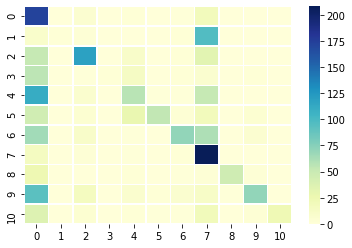

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
acc(y_test,y_pred)

accuracy 0.6637649619151251
Recall: [0.71641791 0.4159292  0.88073394 0.51190476 0.36086957 0.75776398
 0.62325581 0.82173913 0.77777778 0.63981043 0.72340426]
Precision: [0.55813953 0.8245614  0.60952381 0.82692308 0.74774775 0.70520231
 0.64114833 0.61563518 0.9        0.68181818 0.77272727]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.56      0.72      0.63       201
         1.0       0.82      0.42      0.55       113
         2.0       0.61      0.88      0.72       218
         3.0       0.83      0.51      0.63        84
         4.0       0.75      0.36      0.49       230
         5.0       0.71      0.76      0.73       161
         6.0       0.64      0.62      0.63       215
         7.0       0.62      0.82      0.70       230
         8.0       0.90      0.78      0.83        81
         9.0       0.68      0.64      0.66       211
        10.0       0.77      0.72      0.75        94

    accuracy                  

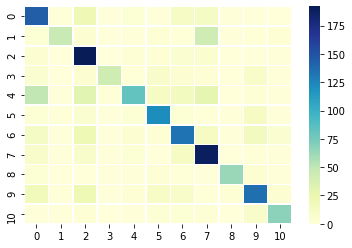

In [39]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=10, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
acc(y_test,y_pred)

accuracy 0.6632208922742111
Recall: [0.61691542 0.5840708  0.71559633 0.5952381  0.54347826 0.72670807
 0.58604651 0.72608696 0.85185185 0.67298578 0.81914894]
Precision: [0.60487805 0.6875     0.67826087 0.71428571 0.5733945  0.75
 0.66315789 0.63257576 0.71134021 0.65437788 0.81052632]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.60      0.62      0.61       201
         1.0       0.69      0.58      0.63       113
         2.0       0.68      0.72      0.70       218
         3.0       0.71      0.60      0.65        84
         4.0       0.57      0.54      0.56       230
         5.0       0.75      0.73      0.74       161
         6.0       0.66      0.59      0.62       215
         7.0       0.63      0.73      0.68       230
         8.0       0.71      0.85      0.78        81
         9.0       0.65      0.67      0.66       211
        10.0       0.81      0.82      0.81        94

    accuracy                        

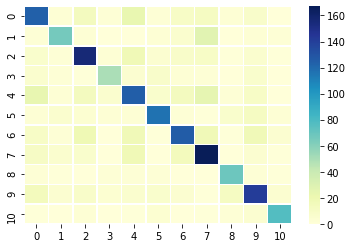

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=4, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
acc(y_test,y_pred)

In [43]:
!pip install gensim

     |████████████████████████████████| 24.2MB 3.2MB/s eta 0:00:011
     |████████████████████████████████| 112kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 5.6MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.11.1-cp37-none-any.whl size=95256 sha256=4315c86d15f53c12468ae00c8755a05d01a7c6353cdcac4f659937f0c8351a8d
  Stored in directory: /home/ravi/.cache/pip/wheels/51/88/6c/2bcd305b87c1e62cbcbf419e782ad9fc612cd4bbb71557502d
Successfully built smart-open
You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(data.Content, data.Label, random_state=0, test_size=0.1)
# X_train = label_sentences(X_train, 'Train')
# X_test = label_sentences(X_test, 'Test')
# all_data = X_train + X_test

/home/ravi/Data Science/MIDAS 2020/midas/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [47]:
import gensim
from gensim.models import doc2vec 
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 18371/18371 [00:00<00:00, 1960899.83it/s]


In [48]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):

    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

accuracy 0.6572361262241567
Recall: [0.6371308  0.56842105 0.77114428 0.64615385 0.51339286 0.75903614
 0.63793103 0.66519824 0.72222222 0.66363636 0.67901235]
Precision: [0.70560748 0.59340659 0.66523605 0.66666667 0.53488372 0.65968586
 0.68837209 0.67410714 0.86666667 0.62660944 0.6547619 ]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       237
         1.0       0.59      0.57      0.58        95
         2.0       0.67      0.77      0.71       201
         3.0       0.67      0.65      0.66        65
         4.0       0.53      0.51      0.52       224
         5.0       0.66      0.76      0.71       166
         6.0       0.69      0.64      0.66       232
         7.0       0.67      0.67      0.67       227
         8.0       0.87      0.72      0.79        90
         9.0       0.63      0.66      0.64       220
        10.0       0.65      0.68      0.67        81

    accuracy                  

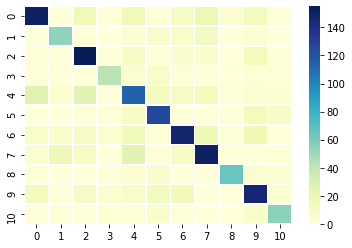

In [49]:
logreg = LogisticRegression(n_jobs=4, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(acc(y_test, y_pred))

accuracy 0.6572361262241567
Recall: [0.6371308  0.56842105 0.77114428 0.64615385 0.51339286 0.75903614
 0.63793103 0.66519824 0.72222222 0.66363636 0.67901235]
Precision: [0.70560748 0.59340659 0.66523605 0.66666667 0.53488372 0.65968586
 0.68837209 0.67410714 0.86666667 0.62660944 0.6547619 ]

 clasification report:
               precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       237
         1.0       0.59      0.57      0.58        95
         2.0       0.67      0.77      0.71       201
         3.0       0.67      0.65      0.66        65
         4.0       0.53      0.51      0.52       224
         5.0       0.66      0.76      0.71       166
         6.0       0.69      0.64      0.66       232
         7.0       0.67      0.67      0.67       227
         8.0       0.87      0.72      0.79        90
         9.0       0.63      0.66      0.64       220
        10.0       0.65      0.68      0.67        81

    accuracy                  

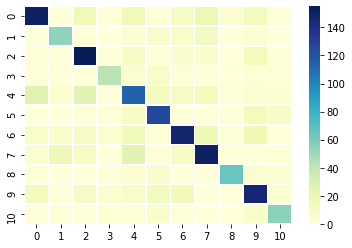

In [50]:
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(acc(y_test, y_pred))

In [54]:
import pickle
with open('sgd.pkl', 'wb') as file:

    # dump information to that file
    pickle.dump(sgd, file)

In [55]:
with open('sgd.pkl', 'rb') as file:

    # dump information to that file
    data = pickle.load(file)

In [57]:
data.predict(X_test)

array([6., 0., 5., ..., 7., 4., 2.])

In [60]:
X_test.values

array(['jayati ghosh professor economics jawaharlal nehru university jnu jnu one best universities india asia possibly world amazing combination good faculty bright students diverse students oh well well well going fun government step create demand basic economics amen government increasing supply demand https enwikipediaorg wiki supplyside_economics lowering corporate tax rates deregulation eez bijiness non sensetheyre reviving economy opposite direction pm cannot acknowledge accept mistake try correct must wmstern concept unlike pms maybach sunglassesi hope keep fucking face huge recession cure fascism recessionother side government exactly takes destroy countrygovernment exact opposite whats needed revive economy jayati ghosh',
       'government websites globally shit aussie trying get new medical insurance card week lost wallet hours trying still succeeded wait 34 hours government office apply person indian sites rubbish government sites globallyeven damn delhi university website 